In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


Consider these two sets of numbers:

X = –1, 0, 1, 2, 3, 4

Y = –3, –1, 1, 3, 5, 7

Relations between X and Y: Y=2X-1

In [ ]:
import tensorflow as tf
import numpy as np

l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

model = tf.keras.Sequential([l0])

model.compile(optimizer='sgd', loss='mean_squared_error')

x = np.array([-1, 0, 1, 2, 3, 4])
y = np.array([-3, -1, 1, 3, 5, 7])

model.fit(x, y, epochs=50)

# Model prediction
print(model.predict([10]))

# Model Weights
print("Model weights: {}".format(l0.get_weights()))


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 47.6593
Epoch 2/50
1/1 [==============================] - 0s 24ms/step - loss: 37.8812
Epoch 3/50
1/1 [==============================] - 0s 14ms/step - loss: 30.1803
Epoch 4/50
1/1 [==============================] - 0s 10ms/step - loss: 24.1138
Epoch 5/50
1/1 [==============================] - 0s 9ms/step - loss: 19.3335
Epoch 6/50
1/1 [==============================] - 0s 10ms/step - loss: 15.5651
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 12.5930
Epoch 8/50
1/1 [==============================] - 0s 19ms/step - loss: 10.2476
Epoch 9/50
1/1 [==============================] - 0s 10ms/step - loss: 8.3953
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 6.9312
Epoch 11/50
1/1 [==============================] - 0s 11ms/step - loss: 5.7727
Epoch 12/50
1/1 [==============================] - 0s 9ms/step - loss: 4.8546
Epoch 13/50
1/1 [==============================] - 0s 10ms

**Training**

Make a guess, measure how good or how bad the guesses with the loss function, then use the optimizer and the data to make another guess and repeat this.

The neural network has no idea of the relationship between X and Y, so it makes a guess. Say it guesses Y equals 10X minus 10. It will then use the data that it knows about, that's the set of Xs and Ys that we've already seen to measure how good or how bad its guess was. The loss function measures this and then gives the data to the optimizer which figures out the next guess. So the optimizer thinks about how good or how badly the guess was done using the data from the loss function. Then the logic is that each guess should be better than the one before.

> Inside the Sequential, you then specify what each layer looks like.

Why prediction is not exactly 19?
1. Loss is not exactly 0. It is very small in number but not 0.
2. We have trained model on limited data. Currently there are only 6 data points.

# Fashion MNIST

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

## Labels
Each training and test example is assigned to one of the following labels:

Label	Description
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

Why Numbers as a Label?
*   Computers do better with Numbers
*   We are not biased towards any one language.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

data = tf.keras.datasets.fashion_mnist

(train_imgs, train_labels), (test_imgs, test_labels) = data.load_data()

4422102/4422102 [==============================] - 2s 0us/step


Training Label:
2
Training Pixel Array:
[[  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  27 134 210 148  44  14   0   0  30 112 211 149  17   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0 157 195 194 184 201 209 198 207 204 198 207 185 193 195 101   0   0   0   0   0   0   0]
 [  0   0   0   0   0  73 202 178 179 180 177 172 176 192 184 173 173 179 182 183 204  55   0   1   0   0   0   0]
 [  0   0   0   0   0 152 192 180 189 183 185 186 182 174 178 181 182 185 193 187 196 177   0   0   0   0   0   0]
 [  0   0   0   0   0 188 195 183 191 187 176 182 178 185 181 176 182 185 195 192 194 185   0   0   0   0   0   0]
 [  0   0   0   0   0 208 196 186 186 185 179 178 184 184 185 175 176 184 193 193 193 208  37   0   0   0   0   0]
 [  0   0   0   0   0 200 199 196 181 188 179 183 193 190 190 186 184 189 197 199 196 214  65   0   0   0   0   0]
 [  0   0   0   0   0 220 200 203 225 19

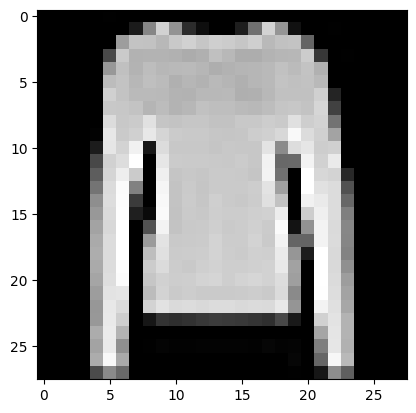

In [2]:
# index of image - between 0 to 60,000
index = 5050

np.set_printoptions(linewidth=320)

print(f"Training Label:\n{train_labels[index]}")
print(f"Training Pixel Array:\n{train_imgs[index]}")

plt.imshow(train_imgs[index], cmap='gray')
plt.show()

**Note**


*   Image has pixel value 0-255 but neural networks work better with Normalizes data.
*   Flatten takes that “square” value (a 2D array) and turns it into a line (a 1D array)

In [ ]:
# Normalizing the image
train_imgs, test_imgs = train_imgs/255.0, test_imgs/255.0

#Model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit
history = model.fit(train_imgs, train_labels, epochs=50, validation_split=0.1)

Epoch 1/50
1688/1688 [==============================] - 17s 6ms/step - loss: 0.4951 - accuracy: 0.8250 - val_loss: 0.4028 - val_accuracy: 0.8528
Epoch 2/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3711 - accuracy: 0.8650 - val_loss: 0.3531 - val_accuracy: 0.8662
Epoch 3/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3320 - accuracy: 0.8793 - val_loss: 0.3667 - val_accuracy: 0.8660
Epoch 4/50
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3081 - accuracy: 0.8854 - val_loss: 0.3317 - val_accuracy: 0.8773
Epoch 5/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2893 - accuracy: 0.8933 - val_loss: 0.3730 - val_accuracy: 0.8707
Epoch 6/50
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2747 - accuracy: 0.8990 - val_loss: 0.3253 - val_accuracy: 0.8832
Epoch 7/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2603 - accuracy: 0.9028 - val_loss: 0.3543 - val_accuracy

In [ ]:
model.evaluate(test_imgs, test_labels)

if training epochs increased ==> training accuracy increase
Also if testing acuracy has not much impact on it ==> Model Overfitting.

**Stopping Training** - ***callback*** - we might want to train until we reach the desired accuracy instead of constantly trying different numbers of epochs and training and retraining until we get to our desired value.

In [ ]:
import tensorflow as tf
data = tf.keras.datasets.fashion_mnist

(train_imgs, train_labels), (test_imgs, test_labels) = data.load_data()

# Normalizing the image
train_imgs, test_imgs = train_imgs/255.0, test_imgs/255.0

#Model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# callback
class MyCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\n95% accuracy achieved. So cancelling futher training!")
      self.model.stop_training = True

callback = MyCallBack()


# Fit with callback condition
model.fit(train_imgs, train_labels, epochs=50, callbacks=[callback])

model.evaluate(test_imgs, test_labels)

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5009 - accuracy: 0.8233
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3783 - accuracy: 0.8629
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3385 - accuracy: 0.8766
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3112 - accuracy: 0.8858
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2964 - accuracy: 0.8902
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2815 - accuracy: 0.8951
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2694 - accuracy: 0.9004
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2582 - accuracy: 0.9032
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2502 - accuracy: 0.9074
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.238

[0.41122832894325256, 0.8913999795913696]